# Model Comparison - Sample size

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from matplotlib.ticker import ScalarFormatter
from PIL import Image
from Model_comparison_functions import *

### For Stochastic

In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Stochastic_Sample_size\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:

Add_on_path_list = ["2\\","5\\","10\\","20\\"]
Array = np.empty( (1, len(Add_on_path_list), 88, 5, 2,1 ) )
for m,paths in enumerate(Add_on_path_list):

    df_Exp_profit = json_to_df(current_directory + Add_on_path + paths +  'Exp_profit.json')
    df_RT_profit  = json_to_df(current_directory + Add_on_path + paths + 'RT_profit.json')
    #print(df_Exp_profit)
    # Setup the arrays
    


    for col in df_Exp_profit.columns:
        
        # Create a four dimensional 

        # (M, D, Model)
        
        # Assign the month, the day, the model, and each of the 

        # Extract the 'm', 'd', and 't' values from column name
        parts = col.split('_')

        #m = len(Add_on_path_list)
        
        f = 1
        
        d = int(parts[2][3:])

        p = 0

        Array[(f-1),(m),(d-1),0,0,p] = df_Exp_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,0,p] = df_Exp_profit[col]['det']
        Array[(f-1),(m),(d-1),2,0,p] = df_Exp_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,0,p] = df_Exp_profit[col]['feature']
        #print(df_Exp_profit[col]['feature'])
        Array[(f-1),(m),(d-1),4,0,p] = df_Exp_profit[col]['oracle']
        
        Array[(f-1),(m),(d-1),0,1,p] = df_RT_profit[col]['rule']
        Array[(f-1),(m),(d-1),1,1,p] = df_RT_profit[col]['det']
        Array[(f-1),(m),(d-1),2,1,p] = df_RT_profit[col]['sto']
        Array[(f-1),(m),(d-1),3,1,p] = df_RT_profit[col]['feature']
        Array[(f-1),(m),(d-1),4,1,p] = df_RT_profit[col]['oracle']

    #print(np.mean(Array[(f-1),(m),:,2,1,p]))
    print(np.mean(Array[0,m,:,2,1,:]))
        


2472.165345225854
2490.9907978289975
2492.1091598079233
2653.6350626415765


In [4]:
np.shape(Array)

(1, 4, 88, 5, 2, 1)

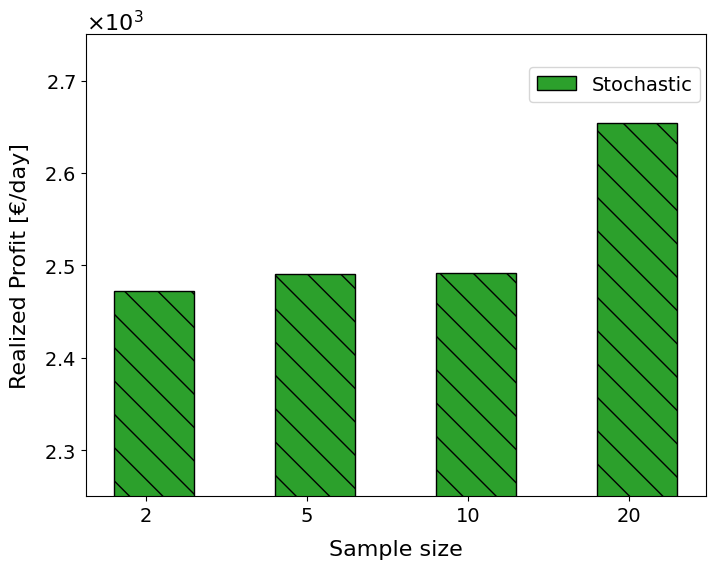

In [5]:
x_axis_tick_label = [2,5,10,20]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5

plot_profit_Test(Array,PlotCase = "Sample size",Selected_models = ['Stochastic'], x_axis_label = "Sample size", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'],legends = ['Stochastic'], barwidth = 0.5,bbox_to_anchor=(0.7,0.95),y_axis_label = 'Realized Profit [\u20AC/day]',ylim=[2.25*10**3,2.75*10**3],pdf_name = 'Profit_bar_sto_fea_samplesize', errorbar= False,ShowEachTestDay = False,save = True)

In [6]:
Add_on_paths = ["\\Results\\Stochastic_Sample_size\\2\\",
                "\\Results\\Stochastic_Sample_size\\5\\",
                "\\Results\\Stochastic_Sample_size\\10\\",
                "\\Results\\Stochastic_Sample_size\\20\\"]

# IF STO DRAW AVERAGE OF IT!!!

Array_Acceptance, Array_Bid,Array_Comp = Collect_bid_results(current_directory,Add_on_paths,1,[2,5,10,20],models=["Sto"])

In [7]:
print(np.shape(Array_Bid))

(6, 24, 88, 5, 4)


(6, 24, 5, 4)


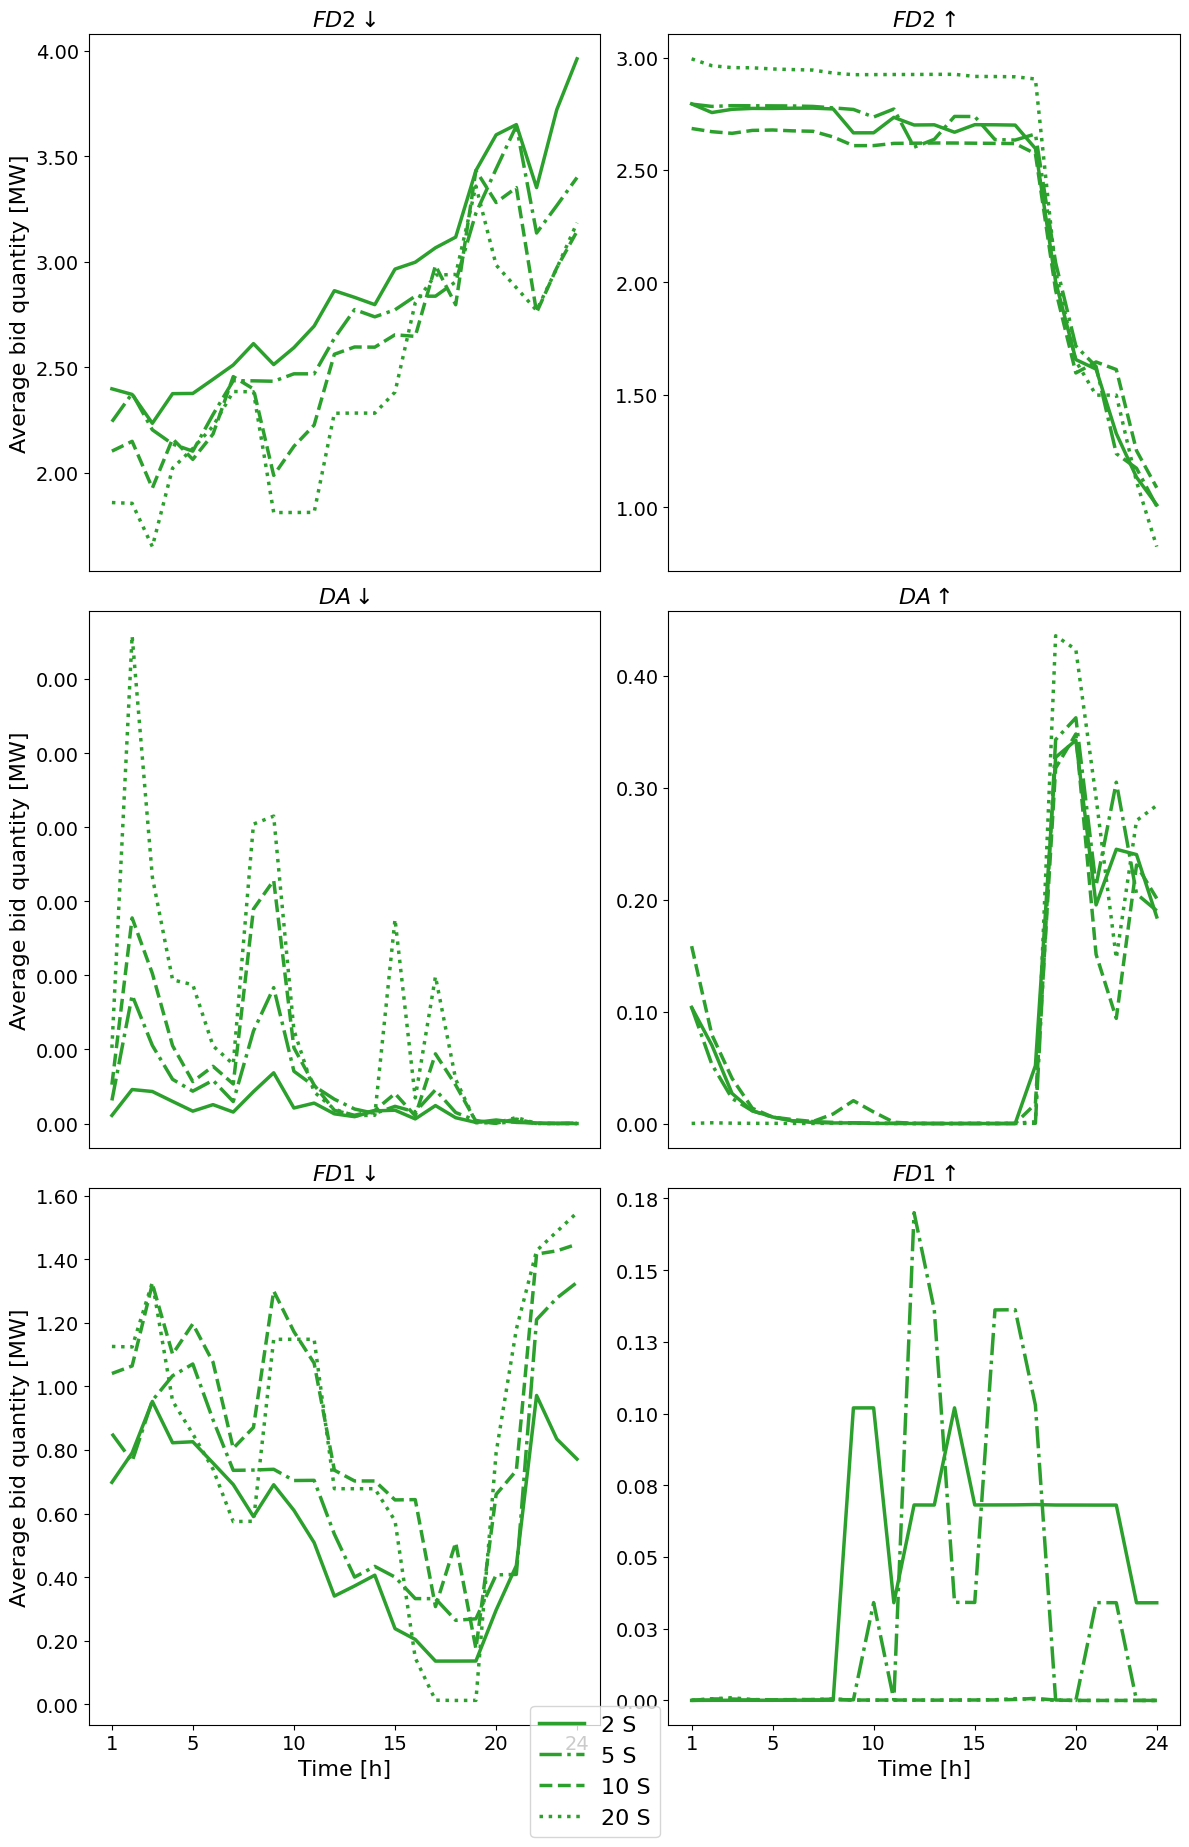

In [8]:
Plot_average_bid_quantities(Array_Bid,Selected_models = ["Stochastic"],Names = ["2","5","10","20"] ,linestyle = ["-","-.","--",":"])

# Check bids for forecast

In [9]:
Add_on_paths = ["\\Results\\Base_case - GA\\Acceptance\\"] 
Array_Acceptance, Array_Bid,Array_Comp = Collect_bid_results(current_directory,Add_on_paths,1,[5],models=["Rule","Det","Sto","Feature","Oracle"])


(6, 24, 5, 1)


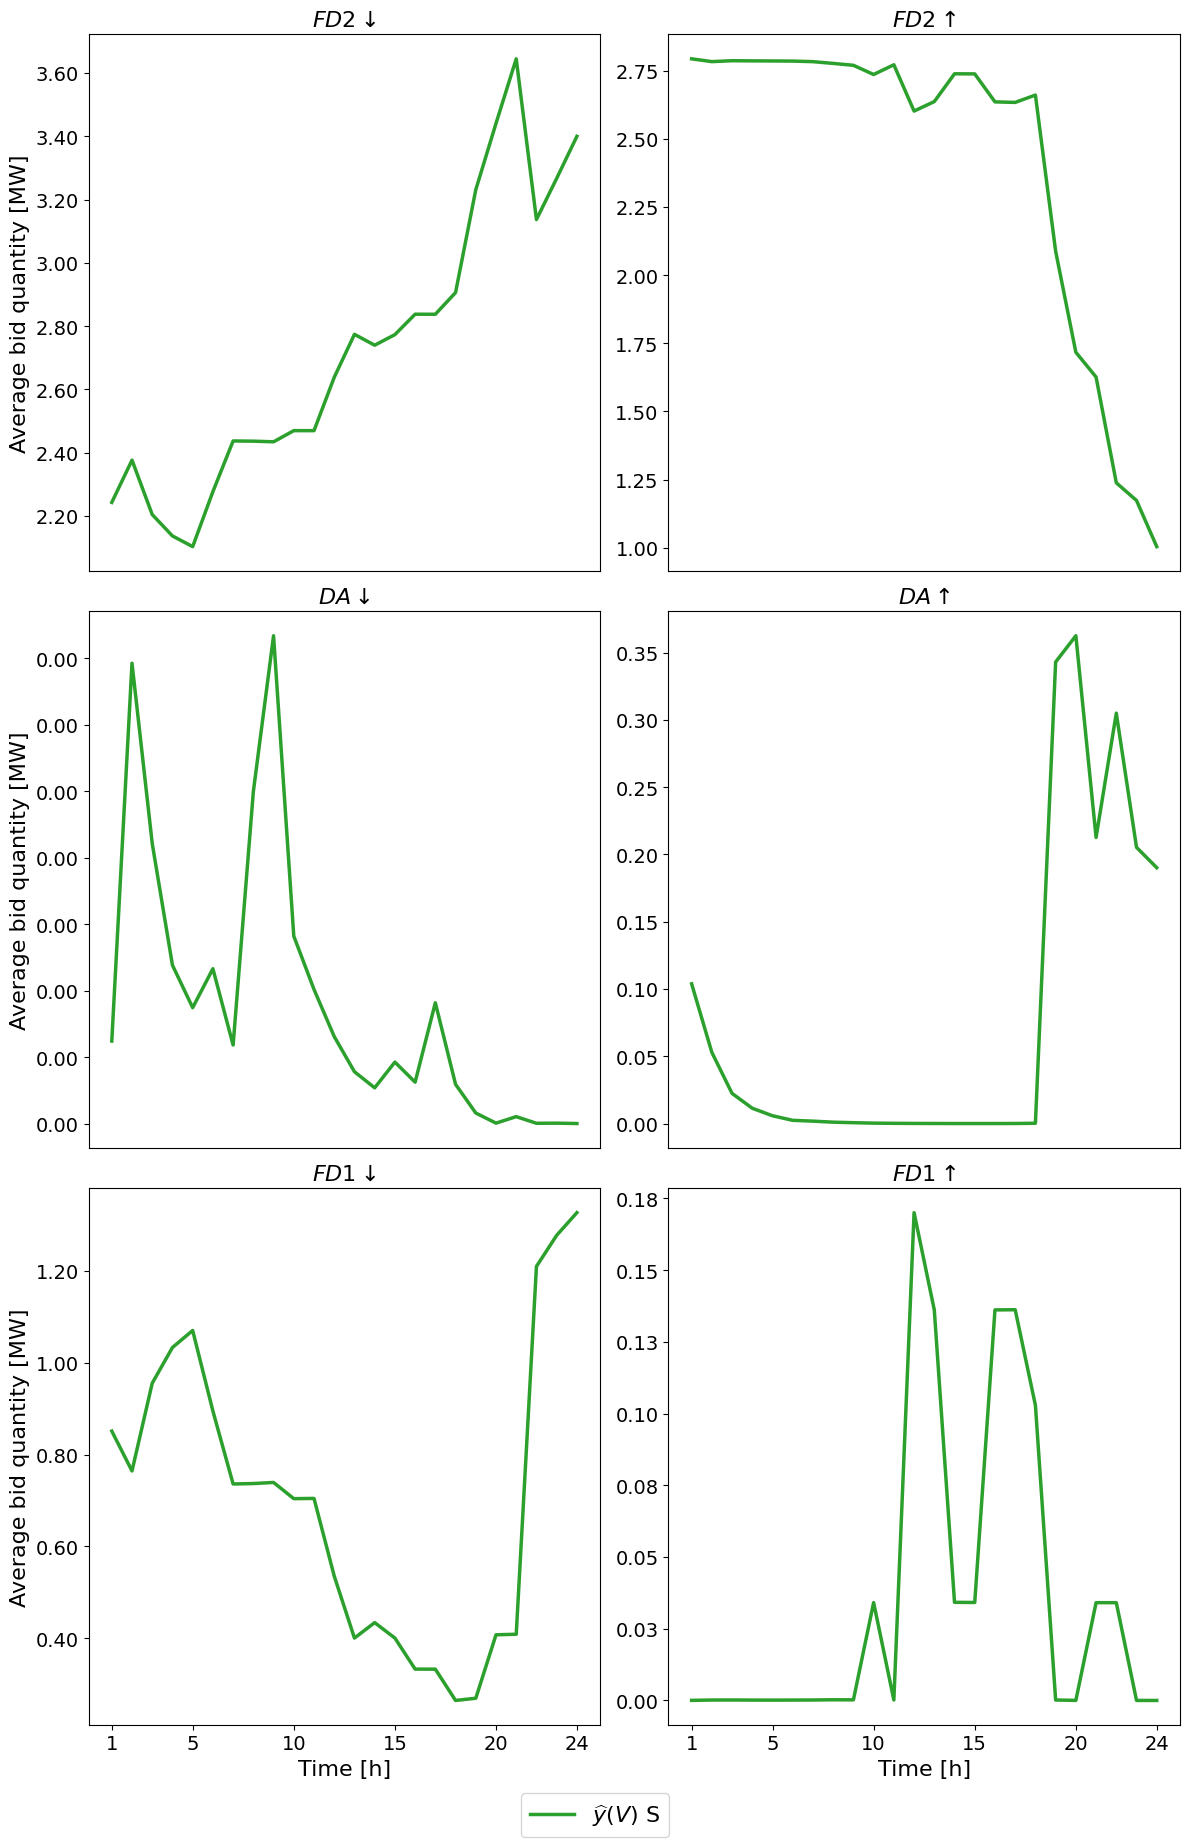

In [10]:

Plot_average_bid_quantities(Array_Bid,Selected_models = ["Stochastic"],Names = ["$\widehat{y}(V)$"] ,linestyle = ["-"])